<a href="https://colab.research.google.com/github/poojasukhdeve-project/DataAnalysis_unicorn/blob/main/data_analysis_unicorn_startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats

# for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure 
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv('/content/Startups.csv', encoding= 'latin-1')
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
# Clean the data 
df = pd.DataFrame(df)
df.rename(columns = {'Date Joined': 'Date'}, inplace = True)
df.rename(columns = {'Valuation ($B)': 'Valuation'}, inplace = True)
df.rename(columns = {'Select Investors': 'Investors'}, inplace = True)
df['Investors'] = df['Investors'].to_string()

date = df.Date.str.split('/', expand = True)
df['year'] = date[2]
df['month'] = date[1]
df['day'] = date[0]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

df['Valuation'] = df['Valuation'].str.replace('$', '')
df.Valuation = pd.to_numeric(df.Valuation)
df.year = pd.to_numeric(df.year)

<ipython-input-4-bb7b6f419a5a>:16: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [5]:
df.head(10)

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


In [6]:
# Unicorn Startup in collaborate different industry areas
fig = px.pie(df, names = 'Industry')
fig.show()

In [7]:
# Year wise company joined the unicorn club

fig2 = px.line(df, x="Company", y= 'year', title='Year wise Company Joined')
fig2.show()

In [8]:
# Country Wise unicorn Startups
# About India

India = df[df['Country'] == "India"]
India

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
12,12,BYJU's,21.00,7/25/2017,India,Bengaluru,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2017,25,7
53,53,OYO Rooms,9.60,9/25/2018,India,Gurugram,Travel,"0 Sequoia Capital China, SIG Asia Investm...",2018,25,9
62,62,Dream11,8.00,4/9/2019,India,Mumbai,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2019,9,4
80,80,National Stock Exchange of India,6.50,7/1/2020,India,Mumbai,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2020,1,7
83,83,Ola Cabs,7.50,10/27/2014,India,Bengaluru,Auto & transportation,"0 Sequoia Capital China, SIG Asia Investm...",2014,27,10
115,115,Swiggy,5.50,6/21/2018,India,Bengaluru,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2018,21,6
126,126,Meesho,4.90,4/5/2021,India,Bengaluru,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,5,4
153,153,CRED,4.01,4/6/2021,India,Bengaluru,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,4
193,193,Digit Insurance,3.50,1/15/2021,India,Bengaluru,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,15,1
199,199,Unacademy,3.44,9/2/2020,India,Bengaluru,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2020,2,9


In [9]:
# Based on Valuation
company_wise_valuation = df.sort_values(by="Valuation", ascending=False)
company_wise_valuation.head(10)

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


In [10]:
# about SpaceX

df[df['Company'] == "SpaceX"]

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12


In [11]:
# Valued startup city in the world
x = df.groupby('City').sum().sort_values(by='Valuation', ascending=False).head(20)
x = x.reset_index()
px.bar(x='City', y='Valuation', data_frame=x)

In [12]:
# Number of Unicorn Startup in a City
df.City.value_counts().head(16)

San Francisco    134
New York          81
Beijing           62
Shanghai          45
London            28
Bengaluru         25
Shenzhen          18
Berlin            16
Paris             15
Chicago           14
Hangzhou          14
Boston            14
Tel Aviv          13
Mountain View     13
Palo Alto         11
Sao Paulo         11
Name: City, dtype: int64

In [13]:
# Unicorn Startup in Bengaluru
df[df.City == 'Bengaluru']['Company']

12                     BYJU's
83                   Ola Cabs
115                    Swiggy
126                    Meesho
153                      CRED
193           Digit Insurance
199                 Unacademy
221                     Udaan
236                  Razorpay
245                 ShareChat
252     Ola Electric Mobility
257                     Groww
299     Mobile Premier League
523                   CureFit
683                      apna
686    Acko General Insurance
709                    InMobi
794                 DailyHunt
871                 BlackBuck
880                   Zetwerk
898                   Vedantu
901                   Licious
920              Mensa Brands
926                  NoBroker
927                     Slice
Name: Company, dtype: object

In [14]:
# Country based Unicorn Startup

df[df.Country == 'India'][['Company', 'Valuation', 'Industry', 'year']]

,Company,Valuation,Industry,year
12,BYJU's,21.00,Edtech,2017
53,OYO Rooms,9.60,Travel,2018
62,Dream11,8.00,Internet software & services,2019
80,National Stock Exchange of India,6.50,Fintech,2020
83,Ola Cabs,7.50,Auto & transportation,2014
115,Swiggy,5.50,"Supply chain, logistics, & delivery",2018
126,Meesho,4.90,Internet software & services,2021
153,CRED,4.01,Fintech,2021
193,Digit Insurance,3.50,Fintech,2021
199,Unacademy,3.44,Edtech,2020


In [15]:
# Fintech Industry based on unicorn in india

df[df.Country == 'India'][df[df.Country=='India'].Industry == 'Fintech']['Company']


80     National Stock Exchange of India
153                                CRED
193                     Digit Insurance
234                           Pine Labs
236                            Razorpay
257                               Groww
266                            BharatPe
304                        PolicyBazaar
420                    CoinSwitch Kuber
681                             CoinDCX
686              Acko General Insurance
927                               Slice
Name: Company, dtype: object

In [16]:
#most valued unicorn based country

y = df.groupby('Country').sum().sort_values(by='Valuation', ascending=False).head(20)
y = y.reset_index()
px.bar(x='Country', y='Valuation', data_frame=y)

In [18]:
# line graph
valuation_wise = px.line(df, x = 'Company', y = 'Valuation')
valuation_wise.show()

In [19]:
#line Graph
#india Based
valuation_india = px.line(India, x='Company', y='Valuation')
valuation_india.show()

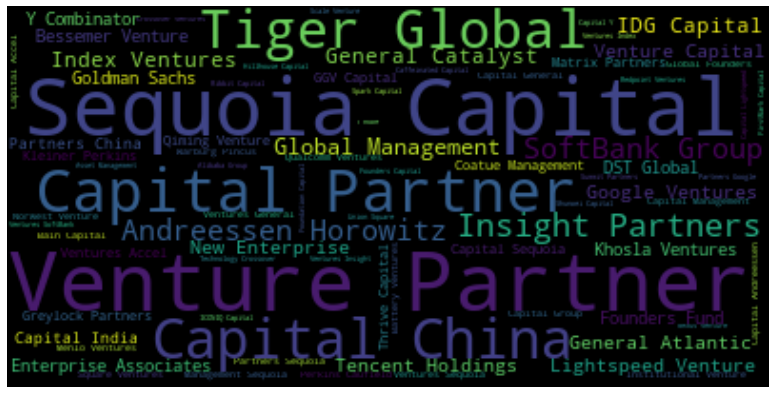

In [20]:
#word CLoud of Investor
from wordcloud import WordCloud
wordCloud = WordCloud().generate(' '.join(df.Investors))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud, interpolation='bilinear')
plt.show()

In [21]:
# Bar Graph Company's Valuation
total_En_St = df.groupby('Company').sum().sort_values('Valuation', ascending=False).head(20)
total_En_St = total_En_St.reset_index()
px.bar(x='Company', y='Valuation', data_frame=total_En_St)


In [22]:
# city
city_count = px.bar(df, x='City', y='Company')
city_count.show()

In [26]:
# Geographical Graph
country_codes = {'afghanistan':	'AFG',
'albania':	'ALB',
'algeria':	'DZA',
'american Samoa':	'ASM',
'andorra':	'AND',
'angola':'AGO',
'anguila':	'AIA',
'antigua and barbuda':	'ATG',
'argentina':	'ARG',
'armenia':	'ARM',
'aruba':	'ABW',
'australia':	'AUS',
'austria':	'AUT',
'azerbaijan':	'AZE',
'bahamas The':'BHS',
'bahrain':	'BHR',
'bangladesh':'BGD',
'barbados':	'BRB',
'Belarus':	'BLR',
'belgium':	'BEL',
'belgium-Luxembourg':'BLX',
'belize':'BLZ',
'benin':'BEN',
'bermuda':'BMU',
'bhutan':'BTN',
'bolivia':'BOL',
'bosnia and herzegovina':'BIH',
'botswana':'BWA',
'br. Antr. Terr':'BAT',
'brazil':	'BRA',
'british Indian Ocean Ter.':	'IOT',
'british Virgin Islands':	'VGB',
'brunei':	'BRN',
'bulgaria':	'BGR',
'burkina Faso':	'BFA',
'burundi':'BDI',
'cambodia':	'KHM',
'cameroon':	'CMR',
'canada':	'CAN',
'cape Verde':	'CPV',
'cayman Islands':	'CYM',
'central African Republic':	'CAF',
'chad':	'TCD',
'chile':	'CHL',
'china':	'CHN',
'christmas Island':	'CXR',
'cocos (Keeling) Islands':	'CCK',
'colombia':	'COL',
'comoros':	'COM',
'congo, Dem. Rep.':	'ZAR',
'congo, Rep.':	'COG',
'cook Islands':	'COK',
'costa Rica':	'CRI',
'cote dIvoire':	'CIV',
'croatia':	'HRV',
'cuba':	'CUB',
'cyprus':	'CYP',
'czech Republic':	'CZE',
'czechoslovakia':	'CSK',
'denmark':	'DNK',
'djibouti':	'DJI',
'dominica':	'DMA',
'dominican Republic':	'DOM',
'east Timor':	'TMP',
'ecuador':	'ECU',
'egypt, Arab Rep.':	'EGY',
'el Salvador':	'SLV',
'equatorial Guinea':	'GNQ',
'eritrea':	'ERI',
'estonia':	'EST',
'ethiopia (excludes Eritrea)':	'ETH',
'ethiopia (includes Eritrea)':	'ETF',
'european Union':	'EUN',
'faeroe Islands':	'FRO',
'falkland Island':	'FLK',
'fiji':	'FJI',
'finland':	'FIN',
'fm Panama Cz':	'PCZ',
'fm Rhod Nyas':	'ZW1',
'fm Tanganyik':	'TAN',
'fm Vietnam Dr':	'VDR',
'fm Vietnam Rp':	'SVR',
'fm Zanz-Pemb':	'ZPM',
'fr. So. Ant. Tr':	'ATF',
'france':	'FRA',
'free Zones':	'FRE',
'french Guian':	'GUF',
'french Polynesia':	'PYF',
'gabon':	'GAB',
'gambia':	'GMB',
'gaza Strip':	'GAZ',
'georgia':	'GEO',
'german Democratic Republic':	'DDR',
'germany':	'DEU',
'ghana':	'GHA',
'gibraltar':	'GIB',
'greece':	'GRC',
'greenland':	'GRL',
'grenada': 'GRD',
'guadeloupe':	'GLP',
'guam':	'GUM',
'guatemala':	'GTM',
'guinea':	'GIN',
'guinea-Bissau':	'GNB',
'guyana':	'GUY',
'haiti':	'HTI',
'holy See':	'VAT',
'honduras':	'HND',
'hong Kong, China':	'HKG',
'hungary':'HUN',
'iceland':	'ISL',
'india':	'IND',
'indonesia':	'	IDN',
'iran, Islamic Rep.':	'	IRN',
'iraq':	'	IRQ',
'ireland':	'	IRL',
'israel':	'	ISR',
'italy':	'	ITA',
'jamaica':	'	JAM',
'japan':	'	JPN',
'jhonston Island':	'	JTN',
'jordan':	'JOR',
'kazakhstan':	'KAZ',
'kenya':	'KEN',
'kiribati':	'KIR',
'korea, Dem. Rep.':	'PRK',
'korea, Rep.':	'KOR',
'kuwait':	'	KWT',
'kyrgyz Republic':	'	KGZ',
'lao PDR':	'LAO',
'latvia':	'LVA',
'lebanon':	'LBN',
'lesotho':	'LSO',
'liberia':	'LBR',
'libya':	'LBY',
'liechtenstein':	'	LIE',
'lithuania':	'LTU',
'luxembourg':'LUX',
'macao':'MAC',
'macedonia, FYR':'	MKD',
'madagascar':'	MDG',
'malawi':'	MWI',
'malaysia':'	MYS',
'maldives':'	MDV',
'mali':'	MLI',
'malta':'	MLT',
'marshall Islands':'	MHL',
'martinique':'	MTQ',
'mauritania':'	MRT',
'mauritius':'	MUS',
'mexico':'	MEX',
'micronesia, Fed. Sts.':'	FSM',
'midway Islands':'	MID',
'moldova':'	MDA',
'monaco':'	MCO',
'mongolia':'	MNG',
'montserrat':'	MSR',
'morocco':'	MAR',
'mozambique':'	MOZ',
'myanmar':'	MMR',
'namibia':'	NAM',
'nauru':'	NRU',
'nepal':'	NPL',
'netherlands':'	NLD',
'netherlands Antilles':'	ANT',
'neutral Zone':'	NZE',
'new Caledonia':'	NCL',
'new Zealand	':'NZL',
'nicaragua':'	NIC',
'niger':'	NER',
'nigeria':'	NGA',
'niue':'	NIU',
'norfolk Island':'	NFK',
'northern Mariana Islands':'	MNP',
'norway':'	NOR',
'oman':'	OMN',
'pacific Islands	':'PCE',
'pakistan':'	PAK',
'palau	':'PLW',
'panama':'	PAN',
'papua New Guinea':'	PNG',
'paraguay':'	PRY',
'pen Malaysia':'	PMY',
'peru':'	PER',
'philippines	':'PHL',
'pitcairn':'	PCN',
'poland':'	POL',
'portugal	':'PRT',
'puerto Rico':'	PRI',
'qatar':'	QAT',
'reunion':	'REU',
'romania':'	ROM',
'russian Federation':'	RUS',
'rwanda':'	RWA',
'ryukyu Is':'	RYU',
'sabah':'	SBH',
'saint Helena':'	SHN',
'saint Kitts-Nevis-Anguilla-Aru':'	KN1',
'saint Pierre and Miquelon':'	SPM',
'samoa':'	WSM',
'san Marino':'	SMR',
'sao Tome and Principe':'	STP',
'sarawak	':'SWK',
'saudi Arabia':'	SAU',
'senegal':'	SEN',
'seychelles':'	SYC',
'sierra Leone':'	SLE',
'sikkim':'	SIK',
'singapore':'	SGP',
'slovak Republic':'	SVK',
'slovenia':'	SVN',
'solomon Islands':'	SLB',
'somalia':'	SOM',
'south Africa':'	ZAF',
'soviet Union':'	SVU',
'spain':'	ESP',
'special Categories':'	SPE',
'sri Lanka':'	LKA',
'st. Kitts and Nevis':'	KNA',
'st. Lucia':'	LCA',
'st. Vincent and the Grenadines':'	VCT',
'sudan':'	SDN',
'suriname':'	SUR',
'svalbard and Jan Mayen Is':'	SJM',
'swaziland':'	SWZ',
'sweden':'	SWE',
'switzerland':'	CHE',
'syrian Arab Republic':'	SYR',
'taiwan':'	TWN',
'tajikistan':'	TJK',
'tanzania':'	TZA',
'thailand':'	THA',
'togo':'	TGO',
'tokelau':'	TKL',
'tonga':'	TON',
'trinidad and Tobago':'	TTO',
'tunisia':'	TUN',
'turkey':'	TUR',
'turkmenistan':'	TKM',
'turks and Caicos Isl.':'	TCA',
'tuvalu':'	TUV',
'uganda':'	UGA',
'ukraine':'	UKR',
'united Arab Emirates':'	ARE',
'united Kingdom':'	GBR',
'united states':	'USA',
'unspecified':	'UNS',
'uruguay':	'URY',
'us Msc.Pac.I':	'USP',
'uzbekistan':	'UZB',
'vanuatu':	'VUT',
'venezuela':	'VEN',
'vietnam':	'VNM',
'virgin Islands (U.S.)':	'VIR',
'wake Island'	:'WAK',
'wallis and Futura Isl.':	'WLF',
'western Sahara':	'ESH',
'world':	'WLD',
'yemen Democratic':	'YDR',
'yemen Rep.':	'YEM',
'yugoslavia':	'SER',
'yugoslavia, FR (Serbia/Montene':	'YUG',
'zambia':	'ZMB',
'zimbabwe':'ZWE'
}

# Countries

from collections import Counter
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

def geoplot(ddf):
  country_with_code, country = {}, {}
  shows_countries = ", ".join(ddf['Country'].dropna()).split(", ")
  for c, v in dict(Counter(shows_countries)).items():
    code = ""
    if c.lower() in country_codes:
      code = country_codes[c.lower()]
    country_with_code[code] = v
    country[c] = v
  
  data = [dict(
      type = "choropleth",
      locations = list(country_with_code.keys()),
      z = list(country_with_code.values()),
      colorscale = [[0,"rgb(5,10,172)"],[0.65,"rgb(40,60,190)"],[0.75,"rgb(70,100,245)"],\
                       [0.80,"rgb(90,120,245)"],[0.9,"rgb(106,137,247)"],[1,"rgb(220,220,220)"]],
      autocolorscale = False,
      reversescale = True,
      marker = dict(
          line = dict (
              color = "gray",
              width = 0.5
          )
      ),
      colorbar = dict(
          autotick = False,
          title = " "
      ),
  )]

  layout = dict(
      title = '',
      geo = dict(
          showframe = False,
          showcoastline = False,
          projection = dict(
              type = "Mercator"
          )
      )
  )
  fig = dict(data = data, layout=layout)
  iplot(fig, validate = False, filename='d3-world-map')
  return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most unicorn", height=700,legend=dict(x=0.1,y=1.1, orientation="h"))
fig = go.Figure(data,layout=layout)
fig.show()



